Text(0, 0.5, 'M(T)')

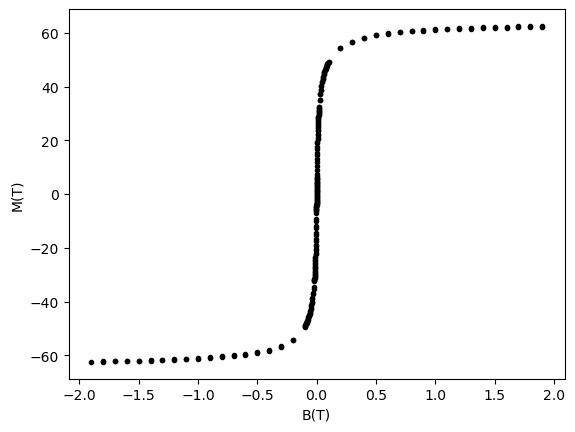

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Define función de Langevin
def langevin(x,a=1):
    """ Langevin function.
        .. math::
            langevin(x;a) = L(a*x) = coth(a*x) - 1/(a*x)
    """
    w = x==0
    if np.any(w):                  #  El condicional está para evitar la 
        w2 = ~w                             #  singularidad removible. 
        y = np.zeros(np.shape(x))                    
        y[w2] = 1./np.tanh(a*x[w2]) -1./(a*x[w2])
        return y
    else:      
        return 1./np.tanh(a*x) -1./(a*x)

mb = 9.27e-24  #J/T
kb = 1.38e-23  #J/K
T = 300

A = np.loadtxt('datos/FF281023Paula(0,00061131g).txt')
x = A[:,0]/1e4 # campo en Tesla
y = A[:,2]

#A = np.loadtxt('datos/12FFPRAG.2col.txt')
#x = A[:,0]/1e4 # campo en Tesla
#y = A[:,1]

# figura del ciclo elegido.
plt.plot(x,y,'.k')
plt.xlabel('B(T)')
plt.ylabel('M(T)')


In [38]:
def f(Ms=1, mu = 1):
    plt.plot(x, y,'.k')
    yl = Ms*langevin(x,mu*mb/kb/T)
    plt.plot(x,yl,'r')
    plt.grid(True)
    plt.ylim(max(y)*np.array([-1.1,1.1]))
    plt.show()

# sliders automáticos
slider_Ms = FloatSlider(min=0, max=max(y)*1.2, step=0.0001, value=max(y)/2, description='Ms', readout_format='.3f')
slider_mu = FloatSlider(min=1, max=1e5, step=1, value=10000, description='mu', readout_format='.0f')

interact(f, Ms=slider_Ms, mu=slider_mu)

interactive(children=(FloatSlider(value=31.28617231846365, description='Ms', max=75.08681356431275, readout_fo…

<function __main__.f(Ms=1, mu=1)>